In [14]:
import nibabel as nib
from nibabel import Nifti1Image
import numpy as np
import os
import pandas as pd
import pydicom
from pydicom.dataset import FileDataset
from pathlib import Path
from typing import Generator
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
image_sizes = [128, 128, 128]

data_dir = "/Volumes/Data/kaggle/raw"

In [3]:
df_train: pd.DataFrame = pd.read_csv(os.path.join(data_dir, 'train.csv'))
mask_files: list = os.listdir(f'{data_dir}/segmentations')
df_mask: pd.DataFrame = pd.DataFrame({
    'mask_file': mask_files,
})
df_mask['StudyInstanceUID'] = df_mask['mask_file'].apply(
  lambda x: x[:-4]
)
df_mask['mask_file'] = df_mask['mask_file'].apply(
  lambda x: os.path.join(data_dir, 'segmentations', x)
)
df = df_train.merge(df_mask, on='StudyInstanceUID', how='left')
df['image_folder'] = df['StudyInstanceUID'].apply(
  lambda x: os.path.join(data_dir, 'train_images', x)
)
df_seg = df[df["mask_file"].notna()].reset_index(drop=True)

kf: KFold = KFold(5)
df_seg['fold'] = -1
for fold, (train_idx, validation_idx) in enumerate(kf.split(df_seg, df_seg)):
  df_seg.loc[validation_idx, 'fold'] = fold

display(df_train)
display(df_mask)
display(df)
display(df_seg)

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2014,1.2.826.0.1.3680043.21684,1,0,1,0,0,0,1,1
2015,1.2.826.0.1.3680043.4786,1,0,0,0,0,0,0,1
2016,1.2.826.0.1.3680043.14341,0,0,0,0,0,0,0,0
2017,1.2.826.0.1.3680043.12053,0,0,0,0,0,0,0,0


,mask_file,StudyInstanceUID
0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.2243
1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.3376
2,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.18906
3,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.18480
4,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.30640
...,...,...
82,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.24606
83,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.8574
84,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.27292
85,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,1.2.826.0.1.3680043.6376


,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,mask_file,image_folder
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....
...,...,...,...,...,...,...,...,...,...,...,...
2014,1.2.826.0.1.3680043.21684,1,0,1,0,0,0,1,1,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2015,1.2.826.0.1.3680043.4786,1,0,0,0,0,0,0,1,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2016,1.2.826.0.1.3680043.14341,0,0,0,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....
2017,1.2.826.0.1.3680043.12053,0,0,0,0,0,0,0,0,NaN,/Volumes/Data/kaggle/raw/train_images/1.2.826....


,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,mask_file,image_folder,fold
0,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
1,1.2.826.0.1.3680043.25704,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
2,1.2.826.0.1.3680043.20647,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
3,1.2.826.0.1.3680043.31077,1,0,0,1,1,1,1,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
4,1.2.826.0.1.3680043.17960,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.2.826.0.1.3680043.32071,1,0,1,0,1,0,1,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
83,1.2.826.0.1.3680043.30524,1,0,0,0,0,0,1,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
84,1.2.826.0.1.3680043.28025,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
85,1.2.826.0.1.3680043.21321,1,1,1,1,0,0,0,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4


In [7]:
def load_dicoms(path: str) -> list[FileDataset]:
  dicom_file_names: list[str] = os.listdir(path=path)
  
  dicom_files: list[FileDataset] = []
  
  for dicom_file_name in dicom_file_names:
    dicom_files.append(
      pydicom.read_file(os.path.join(path, dicom_file_name))
    )
  
  
  return sorted(
    dicom_files,
    key= lambda x: x.InstanceNumber
  )

In [8]:
study: str = "1.2.826.0.1.3680043.10051"
study_row: pd.DataFrame = df[df["StudyInstanceUID"] == study].reset_index(drop=True)
data = load_dicoms(path = study_row.loc[0, "image_folder"])
data

[Dataset.file_meta -------------------------------
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
 (0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10051.1.1
 (0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
 (0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
 (0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
 -------------------------------------------------
 (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10051.1.1
 (0008, 0023) Content Date                        DA: '20220727'
 (0008, 0033) Content Time                        TM: '183713.701337'
 (0010, 0010) Patient's Name                      PN: '10051'
 (0010, 0020) Patient ID                          LO: '10051'
 (0018, 0050) Slice Thickness                     DS: '0.625'
 (0020, 000d) Study Instance UID                  

(-0.5, 511.5, 511.5, -0.5)

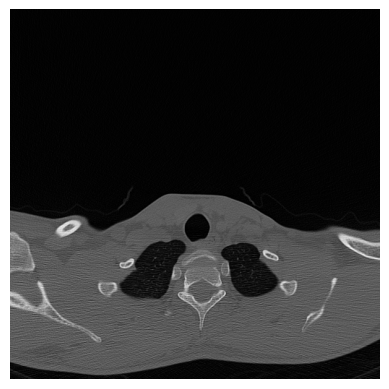

In [6]:
import matplotlib.pyplot as plt

plt.imshow(dicom.pixel_array, cmap="gray")
plt.axis('off')

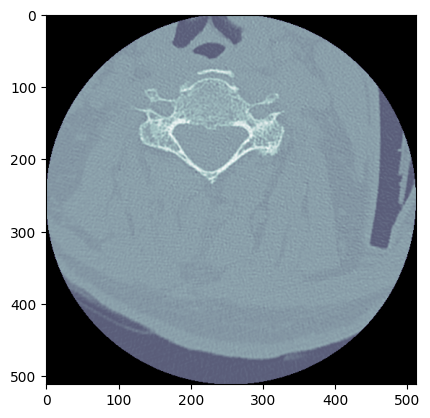

In [9]:
slice_number: int = 133
slice_dicom: FileDataset =  data[slice_number-1]
plt.imshow(slice_dicom.pixel_array, cmap=plt.cm.bone)

In [11]:
df_seg

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,mask_file,image_folder,fold
0,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
1,1.2.826.0.1.3680043.25704,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
2,1.2.826.0.1.3680043.20647,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
3,1.2.826.0.1.3680043.31077,1,0,0,1,1,1,1,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
4,1.2.826.0.1.3680043.17960,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.2.826.0.1.3680043.32071,1,0,1,0,1,0,1,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
83,1.2.826.0.1.3680043.30524,1,0,0,0,0,0,1,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
84,1.2.826.0.1.3680043.28025,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4
85,1.2.826.0.1.3680043.21321,1,1,1,1,0,0,0,1,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,4


In [12]:
study: str = "1.2.826.0.1.3680043.20647"
study_row: pd.DataFrame = df_seg[df_seg["StudyInstanceUID"] == study].reset_index(drop=True)
data = load_dicoms(path = study_row.loc[0, "image_folder"])
data

[Dataset.file_meta -------------------------------
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
 (0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.20647.1.1
 (0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
 (0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
 (0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
 -------------------------------------------------
 (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.20647.1.1
 (0008, 0023) Content Date                        DA: '20220727'
 (0008, 0033) Content Time                        TM: '182214.154175'
 (0010, 0010) Patient's Name                      PN: '20647'
 (0010, 0020) Patient ID                          LO: '20647'
 (0018, 0050) Slice Thickness                     DS: '0.625'
 (0020, 000d) Study Instance UID                  

In [13]:
study_row

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,mask_file,image_folder,fold
0,1.2.826.0.1.3680043.20647,0,0,0,0,0,0,0,0,/Volumes/Data/kaggle/raw/segmentations/1.2.826...,/Volumes/Data/kaggle/raw/train_images/1.2.826....,0


In [15]:
image_path: str = study_row.loc[0, "mask_file"]
image_obj: Nifti1Image = nib.load(image_path)

print(f'Type of the image {type(image_obj)}.')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>.


In [63]:
image_data: np.memmap = image_obj.get_fdata()
height, width, depth = image_data.shape
i = np.random.randint(depth-1)

print(f"Plotting layer {i}")

Plotting layer 44


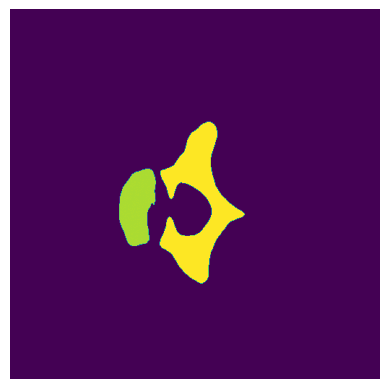

In [64]:
plt.imshow(np.flip(image_data[:, :, i]/255,))
# plt.imshow(data[i].pixel_array, cmap=plt.cm.bone)
plt.axis('off')
plt.show()

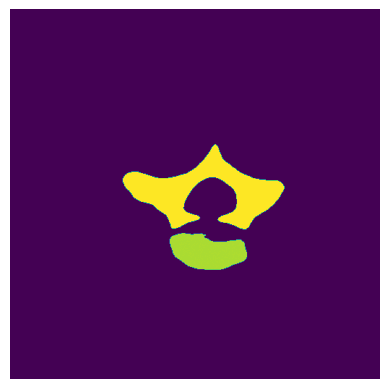

In [65]:
plt.imshow(rotate(np.flip(image_data[:, :, i]/255,), +90))
# plt.imshow(data[i].pixel_array, cmap=plt.cm.bone)
plt.axis('off')
plt.show()

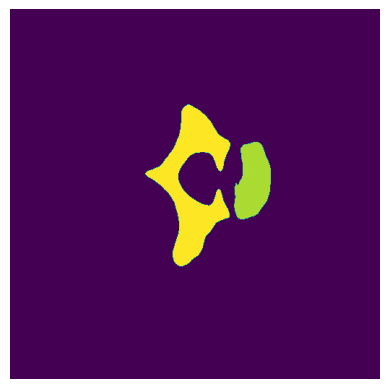

In [66]:
plt.imshow(image_data[:, :, i]/255)
# plt.imshow(data[i].pixel_array, cmap=plt.cm.bone)
plt.axis('off')
plt.show()

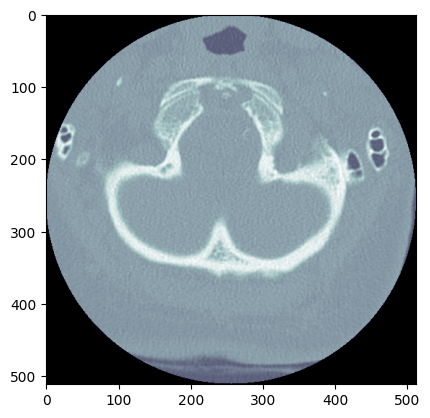

In [67]:
plt.imshow(data[i].pixel_array, cmap=plt.cm.bone)

In [37]:
from monai.transforms import Resize

/Users/inventrohyder/Downloads/rsna-cervical-spine/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
mask_org = nib.load(image_path).get_fdata()
shape = mask_org.shape
mask_org = mask_org.transpose(1, 0, 2)[::-1, :, ::-1]  # (d, w, h)
mask = np.zeros((7, shape[0], shape[1], shape[2]))
for cid in range(7):
    mask[cid] = (mask_org == (cid+1))
mask = mask.astype(np.uint8) * 255
image_sizes = [128, 128, 128]
R = Resize(image_sizes)
mask = R(mask).numpy()

TypeError: Invalid shape (3, 128, 128) for image data

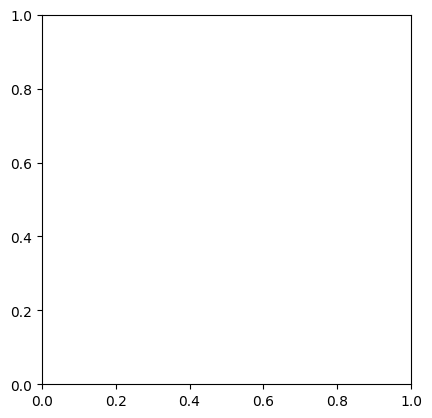

In [40]:
mask_org = nib.load(image_path).get_fdata()
shape = mask_org.shape
mask_org = mask_org.transpose(1, 0, 2)[::-1, :, ::-1]  # (d, w, h)
mask = np.zeros((7, shape[0], shape[1], shape[2]))
for cid in range(7):
    mask[cid] = (mask_org == (cid+1))
mask = mask.astype(np.uint8) * 255
image_sizes = [128, 128, 128]
R = Resize(image_sizes)
mask = R(mask).numpy()
mask = mask[:, :, :, 60]
mask[0] = mask[0] + mask[3] + mask[6]
mask[1] = mask[1] + mask[4]
mask[2] = mask[2] + mask[5]
mask = mask[:3]
plt.imshow(mask, alpha=0.5)

In [41]:
from skimage.transform import rotate

In [76]:
idx = i
import matplotlib.patches as patches

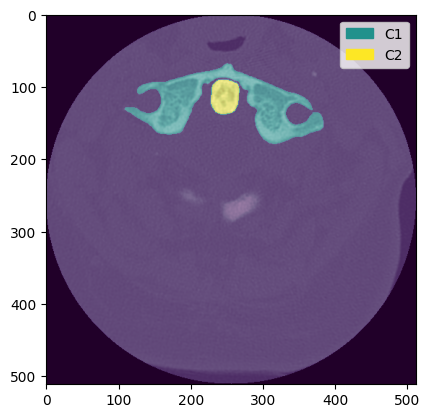

In [86]:
idx=58
fig, ax = plt.subplots()
image_data: np.memmap = image_obj.get_fdata()
image_data = np.flip(image_data, axis=-1)
image_data = rotate(image_data, + 90)
SegmEx = image_data[:, :, idx]
ax.imshow(data[idx].pixel_array, cmap=plt.cm.bone)
segm_im = ax.imshow(SegmEx, alpha=0.5)
SegLabels = np.array( [ round(number, 5) for number in np.unique(SegmEx)] )
SegLabels = np.unique(SegLabels[SegLabels.nonzero()])
segm_max = SegmEx.max()
segm_colors = [segm_im.cmap(label/segm_max) for label in SegLabels]
ptch = [patches.Patch(color=segm_colors[i], label=f"C{int(SegLabels[i])}") for i in range(len(SegLabels))]
ax.legend(handles=ptch)

(-0.5, 511.5, 511.5, -0.5)

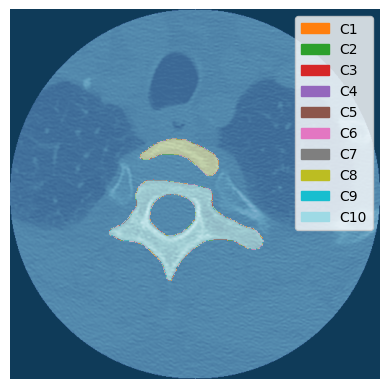

In [91]:
idx=250
fig, ax = plt.subplots()
image_data: np.memmap = image_obj.get_fdata()
image_data = np.flip(image_data, axis=-1)
image_data = rotate(image_data, + 90)


In [92]:
from matplotlib import animation

from IPython.display import HTML

In [103]:
fig, ax = plt.subplots(figsize=(6,6))

# ims is a list of lists, each row is a list of artists to draw in the
ims = []
for idx in range(image_data.shape[2]):
    SegmEx = image_data[:, :, idx]
    another = ax.imshow(data[idx].pixel_array, cmap=plt.cm.bone)
    segm_im = ax.imshow(SegmEx, alpha=0.5, cmap=plt.cm.tab20)
    SegLabels = np.array( [ round(number, 5) for number in np.unique(image_data)] )
    SegLabels = np.unique(SegLabels[SegLabels.nonzero()])
    segm_max = image_data.max()
    segm_colors = [segm_im.cmap(label/segm_max) for label in SegLabels]
    ptch = [
        patches.Patch(
            color=segm_colors[i], 
            label=f"C{int(SegLabels[i])}"
        ) if i < 8 else patches.Patch(
            color=segm_colors[i], 
            label=f"T{int(SegLabels[i])}"
        ) for i in range(len(SegLabels))
    ]
    ax.legend(handles=ptch)
    ax.axis("off")

    ims.append([segm_im, another])

ani = animation.ArtistAnimation(fig, ims, interval=10 ,repeat_delay=1000)

plt.close()
HTML(ani.to_html5_video())

In [102]:
[i if i % 2 == 0 else i**2 for i in range (10)]

[0, 1, 2, 9, 4, 25, 6, 49, 8, 81]

In [96]:
fig, ax = plt.subplots(figsize=(6,6))

# ims is a list of lists, each row is a list of artists to draw in the
ims = []
for idx in range(2):
    SegmEx = image_data[:, :, idx]
    another = ax.imshow(data[idx].pixel_array, cmap=plt.cm.bone)
    segm_im = ax.imshow(SegmEx, alpha=0.5, cmap=plt.cm.tab20)
    SegLabels = np.array( [ round(number, 5) for number in np.unique(image_data)] )
    SegLabels = np.unique(SegLabels[SegLabels.nonzero()])
    segm_max = image_data.max()
    segm_colors = [segm_im.cmap(label/segm_max) for label in SegLabels]
    ptch = [patches.Patch(color=segm_colors[i], label=f"C{int(SegLabels[i])}") for i in range(len(SegLabels))]
    ax_legend = ax.legend(handles=ptch)
    ax_off = ax.axis("off")

    ims.append([segm_im, another])

ani = animation.ArtistAnimation(fig, ims, interval=10 ,repeat_delay=1000)

plt.close()
HTML(ani.to_html5_video())

2022-12-15 07:35:01,046 - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2022-12-15 07:35:01,049 - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 600x600 -pix_fmt rgba -r 100.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/v4/6lzcc_4j4qn2hj39qtyjtc_80000gn/T/tmphzx1rwdd/temp.m4v


In [ ]:
def plotPatches(data ,rows, columns, steps ):
    
    fig, ax = plt.subplots(rows, columns, figsize = (24,15))
    ax = ax.flatten()

    count = 0
    idx = 0
    while count < rows * columns:
    
        SegmEx = data[:, :, idx]
    
        if SegmEx.max() > 0:
        
           ## Reading and Rescaling
           dcmFile = dcm.dcmread(os.path.join(patientPath, f"{idx+1}.dcm"))
           dcmHuScale = dcmFile.pixel_array * dcmFile.RescaleSlope + dcmFile.RescaleIntercept 
        
           # Ploting imshow dcmFile
           ax[count].imshow(dcmHuScale, cmap="bone")
           ax[count].axis("off")
        
           ## Ploting sementation file
           segm_im = ax[count].imshow(SegmEx, alpha=0.4)
           segm_max = SegmEx.max()
        
           # Creating Labels and patchs
           SegLabels = np.array( [ round(number, 5) for number in np.unique(SegmEx)] )
           SegLabels = np.unique(SegLabels[SegLabels.nonzero()])
           segm_colors = [segm_im.cmap(label/segm_max) for label in SegLabels]
           ptch = [patches.Patch(color=segm_colors[i], label=f"C{int(SegLabels[i])}") for i in range(len(SegLabels))]
           ax[count].legend(handles=ptch)
        
           count += 1
        idx += steps